## Importing the Libraries and Dataset

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, auc
%matplotlib inline

#### Dataset

In [158]:
df=pd.read_csv('default of credit card clients.csv', skiprows=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Data Cleaning 

In [159]:
# First, we check if there are missing data: 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

* There are no missing data for our database. Next, we take look into more details to the data.
* "default.payment.next.month" is a feature and is the target variable we are trying to predict.

In [160]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


* Total 30,000 clients in the dataset;

* The average amount of credit card is (NT dollar) 167,484. Minimal amount a credit card can receive is (NT dollar)10000 while max value is (NT dollar)1M

* In average, the client who owns a credit card is 35.48 year old in our sample, the yougest age one can get a credit card is 21 while the most senior  age is 79. 

### Drop ID and rename "default.payment.next.month"

In [161]:
df.drop(["ID"], axis=1, inplace= True) 
df.rename(columns={"default payment next month": "Default"}, inplace=True)

In [162]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

In [163]:
dat = df[df['BILL_AMT1'] > 0]['Default'].value_counts(sort=0)
dat[1] / dat[0] *100

27.99290018216638

### Negative Bill Amount

In [164]:
for column in ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']:
    df[column] = df[column].apply(lambda x: x if x > 0 else -x)

### Drop repeated Categories:
Some categorical data have repeated categories. First, let check which features contain repeated catigories and then drop the repeated one:

In [165]:
ca=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in ca:
    print (i,df[i].unique())


SEX [2 1]
EDUCATION [2 1 3 5 4 6 0]
MARRIAGE [1 2 3 0]
PAY_0 [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3 [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4 [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5 [-2  0 -1  2  3  5  4  7  8  6]
PAY_6 [-2  2  0 -1  3  6  4  7  8  5]


### EDUCATION FEATURE:
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* category 4,5,6 and 0 can Group into class 4


In [166]:
df['EDUCATION'].replace({0:4,5:4,6:4}, inplace=True)
df.EDUCATION.value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

### MARRIAGE FEATURE:
* Marital status (1=married, 2=single, 3=others)
* We'll group categories 1 into category 3


In [167]:
df['MARRIAGE'].replace({0:3}, inplace=True)
df.MARRIAGE.value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

### PAY FEATURES

In [168]:
df[df['BILL_AMT1'] < 0]['Default'].value_counts(sort=0)

Series([], Name: count, dtype: int64)

In [169]:
dat = df[df['PAY_0'] == -1]['Default'].value_counts(sort=0)
dat[1] / dat[0] *100

20.160608622147084

## Feature Engineering

In [170]:
df['Total_Bill_Amount'] = df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6'] 

df['Total_Pay_Amount'] = df['PAY_AMT1'] + df['PAY_AMT2'] + df['PAY_AMT3'] + df['PAY_AMT4'] + df['PAY_AMT5'] + df['PAY_AMT6'] 

df['Diff_Bill_Pay'] = df['Total_Bill_Amount'] - df['Total_Pay_Amount']

df['Median_PAY'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].median(axis=1)

## Exploratory Data Analysis
### Target Variable:
We'll visualize the target column "default" to figure out how imblance (balance) the data is


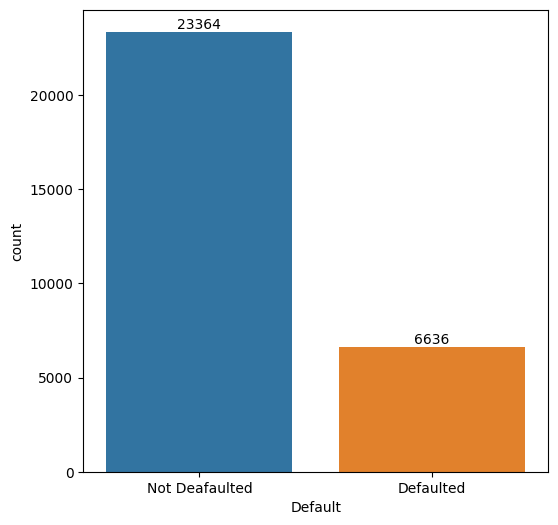

In [171]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x= df['Default'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["Not Deafaulted", "Defaulted"])
plt.show()

The data is quite imbalance which about 22% of clients will default next month. 

### SEX Variable:

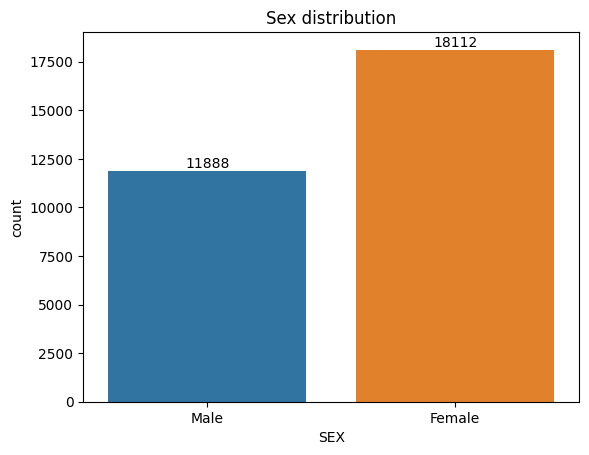

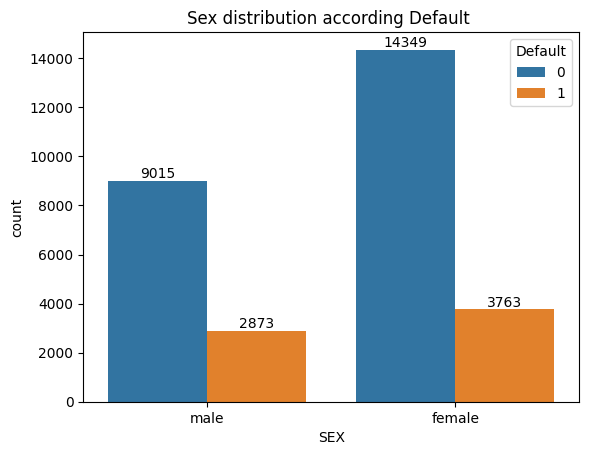

In [172]:
ax=sns.countplot(x= df['SEX'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["Male", "Female"])
plt.title("Sex distribution")
plt.show()

ax=sns.countplot(data=df, x="SEX", hue="Default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["male", "female"])
plt.title("Sex distribution according Default ")
plt.show()

* More Female clients own credit card than Male client. 
* 24% of male clients fraud credit card while the ratio for female is around 20%

### EDUCATION Variable:


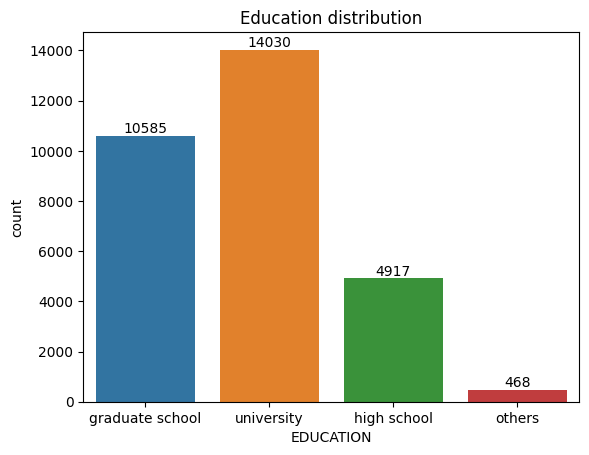

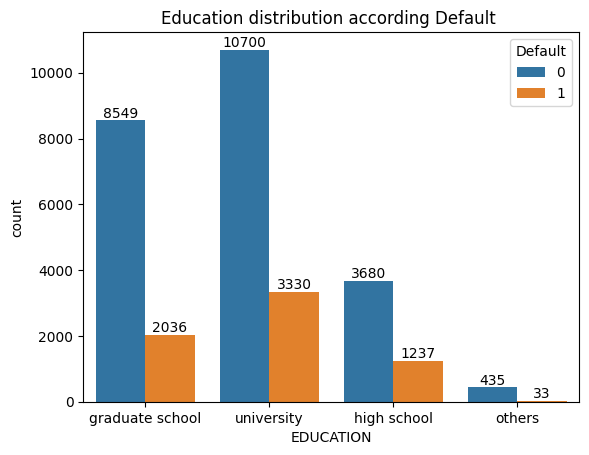

In [173]:
ax=sns.countplot(x= df['EDUCATION'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=["graduate school", "university",'high school','others'])
plt.title("Education distribution")
plt.show()

ax=sns.countplot(data=df, x="EDUCATION", hue="Default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=["graduate school", "university",'high school','others'])
plt.title("Education distribution according Default ")
plt.show()

*  University students are the group which highest number customers using credit cards (47%)
* High school students are the group which has highest fraud cases(25%), follow by university student(23%)

### MARRIAGE STATUS VARIABLE:

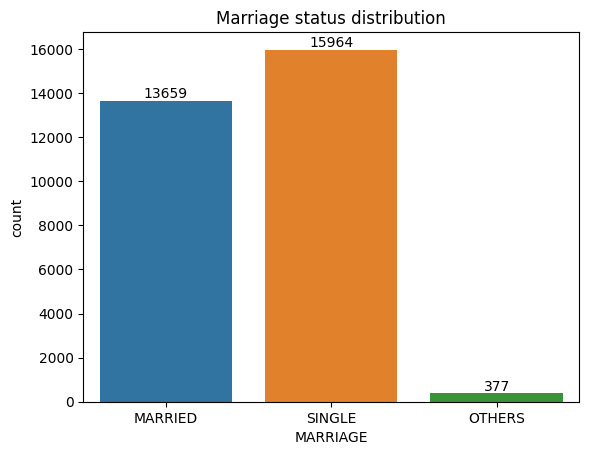

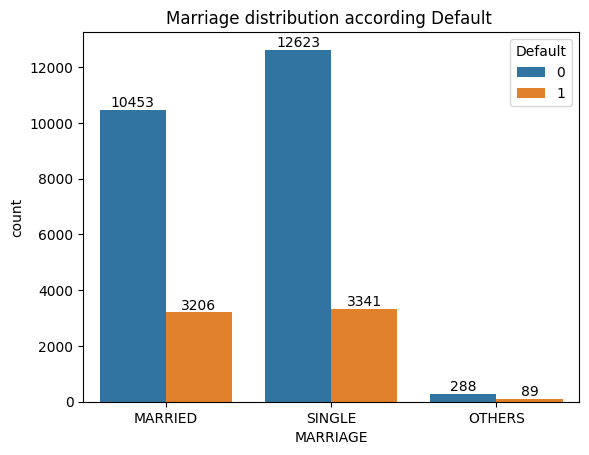

In [174]:
ax=sns.countplot(x= df['MARRIAGE'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2], labels=["MARRIED", "SINGLE",'OTHERS'])
plt.title("Marriage status distribution")
plt.show()

ax=sns.countplot(data=df, x="MARRIAGE", hue="Default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2], labels=["MARRIED", "SINGLE",'OTHERS'])
plt.title("Marriage distribution according Default ")
plt.show()

* Single is the group which highest number of customers using credit cards (53%)
* Married people are the group which has highest fraud cases(30%)

### AGE VARIABLE:

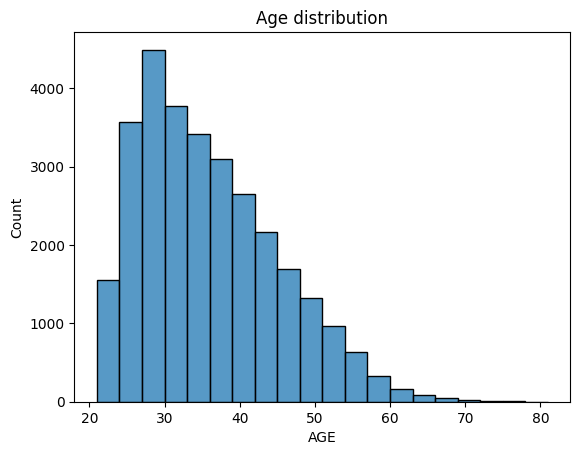

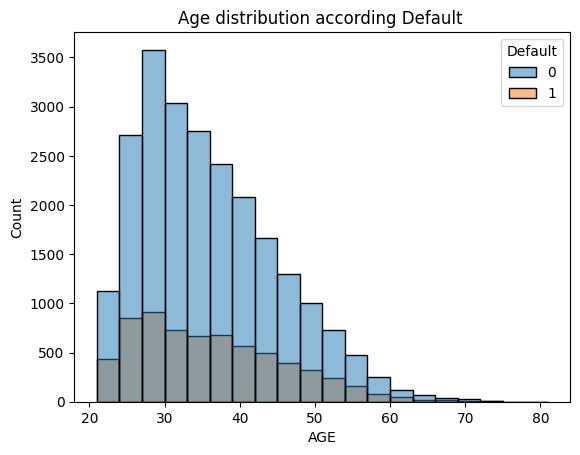

In [175]:
sns.histplot(data=df, x="AGE",binwidth=3)
plt.title("Age distribution")
plt.show()

sns.histplot(data=df, x="AGE", hue="Default", binwidth=3)
plt.title("Age distribution according Default ")
plt.show()

* Histogram is right-skewed meaning the older customers are less likely to use credit cards
* The main client is in  their 30s
* Customers in their 30s are also the most prone to credit fraud

### LIMIT_BAL VARIABLE:

c:\Users\Upendra\Desktop\Cogoport Training\Git\Python_cogoportTraining\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


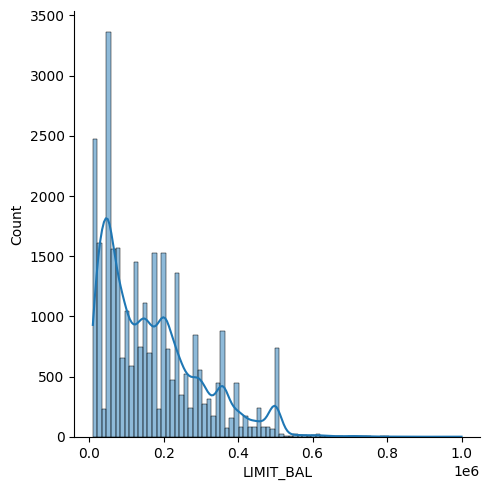

In [176]:
sns.displot(df.LIMIT_BAL, kde=True)

### Correlation Analysis

<Axes: >

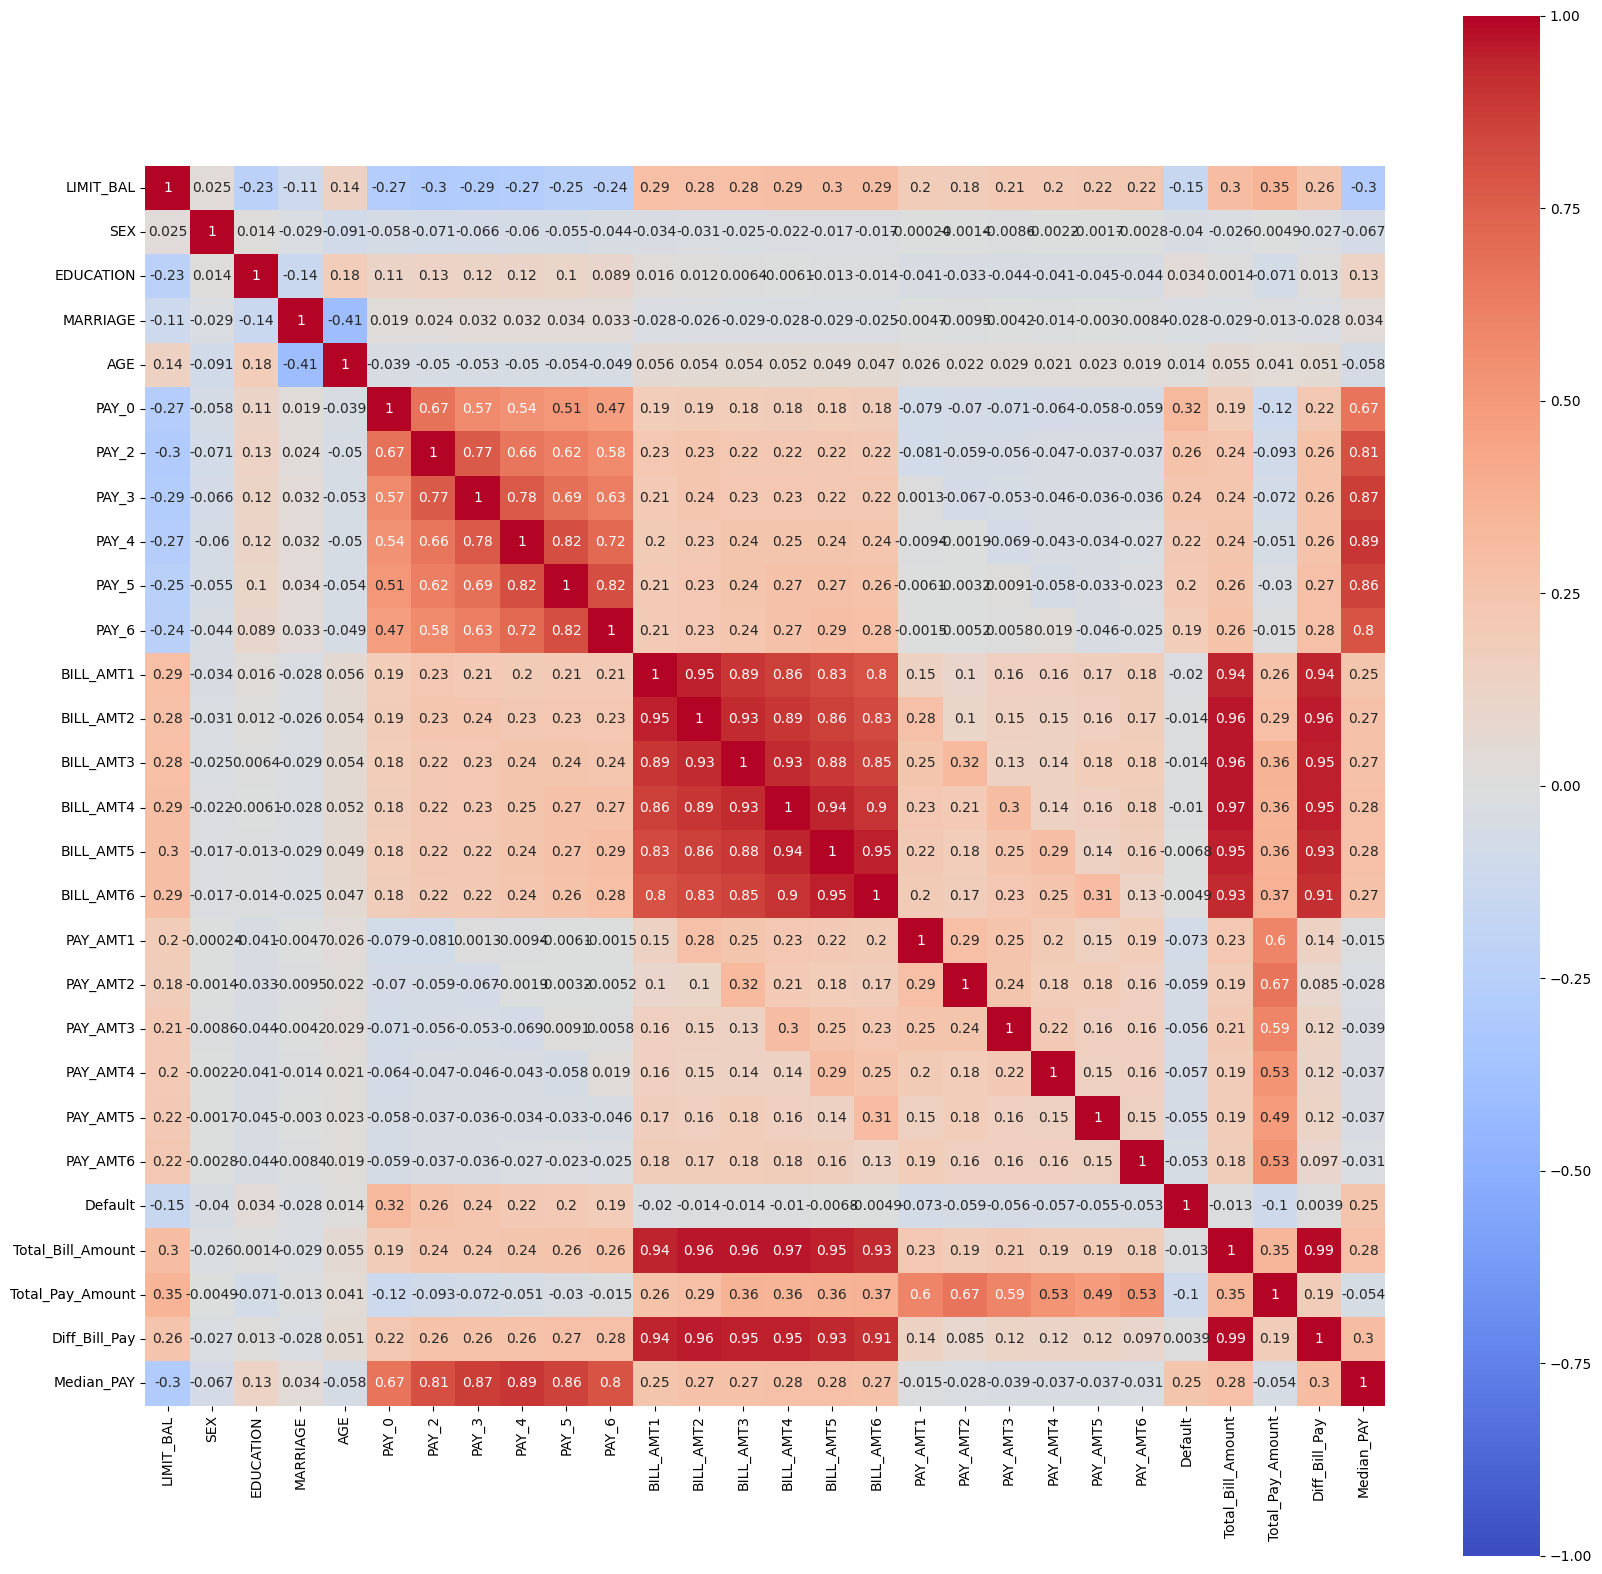

In [177]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True,square = True, cmap='coolwarm', vmin=-1, vmax=1)

Correlation is high among  PAY_0,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6. 

### Feature Selection:

In [178]:
X = df.drop(['Default'], axis=1)

y = df['Default']

correlation_matrix = df.corr()
corr_with_target = correlation_matrix['Default'].abs().sort_values(ascending=False)
important_features_corr = corr_with_target[corr_with_target > 0.005].index.tolist()
important_features_corr.remove('Default')  

X = X[important_features_corr]

X.columns

Index(['PAY_0', 'PAY_2', 'Median_PAY', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'LIMIT_BAL', 'Total_Pay_Amount', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT4',
       'PAY_AMT3', 'PAY_AMT5', 'PAY_AMT6', 'SEX', 'EDUCATION', 'MARRIAGE',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'AGE', 'Total_Bill_Amount',
       'BILL_AMT4', 'BILL_AMT5'],
      dtype='object')

In [179]:
len(df.columns)-1-len(X.columns) 

2

In [180]:
scaler= StandardScaler()
X= scaler.fit_transform(X)

In [181]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

### Balancing the data




In [182]:
from imblearn.over_sampling import SMOTE
print("Before oversampling: ",Counter(y_train))
SMOTE= SMOTE()


X_train_resample,y_train_resample= SMOTE.fit_resample(X_train,y_train)

print("After oversampling: ",Counter(y_train_resample))

Before oversampling:  Counter({0: 18691, 1: 5309})
After oversampling:  Counter({0: 18691, 1: 18691})


## Building Model: 

In [183]:
def plot_confusion_matrix(matrix):
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [184]:
def model_evaluation(model, X_test = X_test):
    y_pred= model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1]

    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Roc_auc score: ", metrics.roc_auc_score(y_test, y_pred_prob))
    print(classification_report(y_test, y_pred))
    print('\nconfusion matrix:')
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)

### a) Logistic Regression


Accuracy:  0.6758333333333333
Roc_auc score:  0.7152087115274119
              precision    recall  f1-score   support

           0       0.87      0.69      0.77      4673
           1       0.37      0.64      0.47      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.70      6000


confusion matrix:


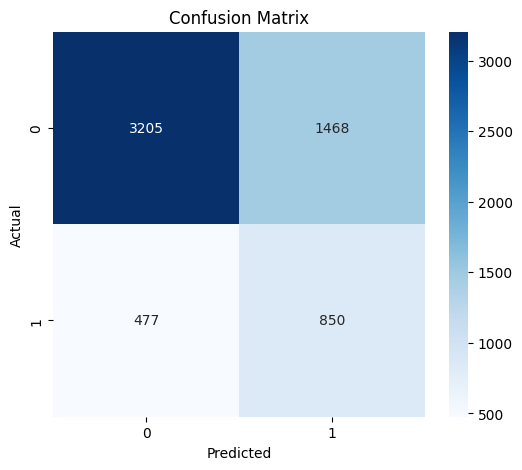

In [185]:
logit= LogisticRegression()
logit.fit(X_train_resample, y_train_resample)
model_evaluation(logit)

### c) Random Forest:

Accuracy:  0.7903333333333333
Roc_auc score:  0.7469333120036844
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      4673
           1       0.53      0.46      0.49      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.67      0.68      6000
weighted avg       0.78      0.79      0.79      6000


confusion matrix:


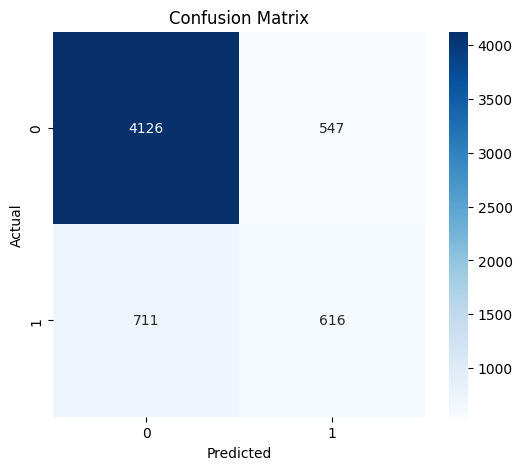

In [186]:
rf= RandomForestClassifier()
rf.fit(X_train_resample,y_train_resample)
model_evaluation(rf)

### d) XGBoost:


Accuracy:  0.8098333333333333
Roc_auc score:  0.762403139715704
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.35      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.64      0.67      6000
weighted avg       0.79      0.81      0.79      6000


confusion matrix:


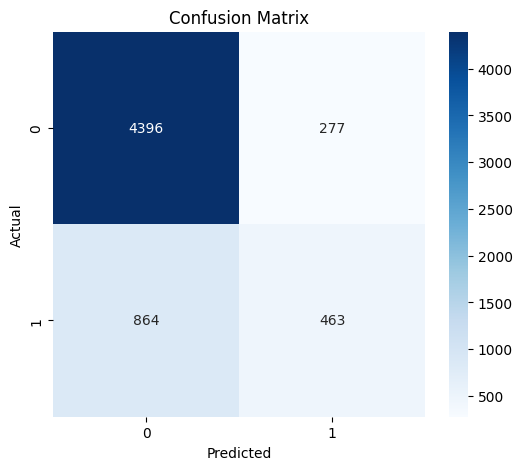

In [187]:
xgboost= XGBClassifier()


xgboost.fit(X_train,y_train)
model_evaluation(xgboost)

## Model Optimization

### Hyper parameter turning: 

In [188]:
## Hyper Parameter Optimization
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train) 

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='roc_auc', verbose=2)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}
Accuracy:  0.8176666666666667
Roc_auc score:  0.7800324331071197
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000


confusion matrix:


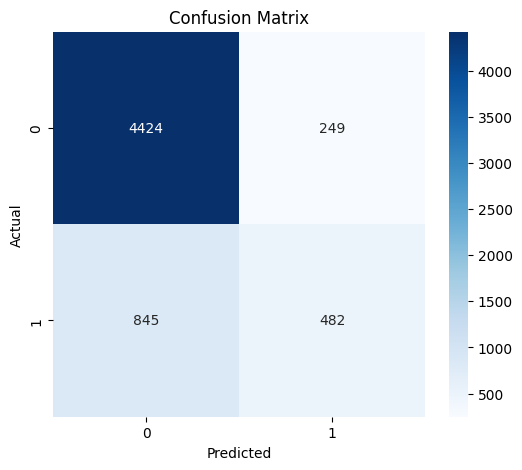

In [189]:
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
model_evaluation(best_model)

## Compare Model Performance

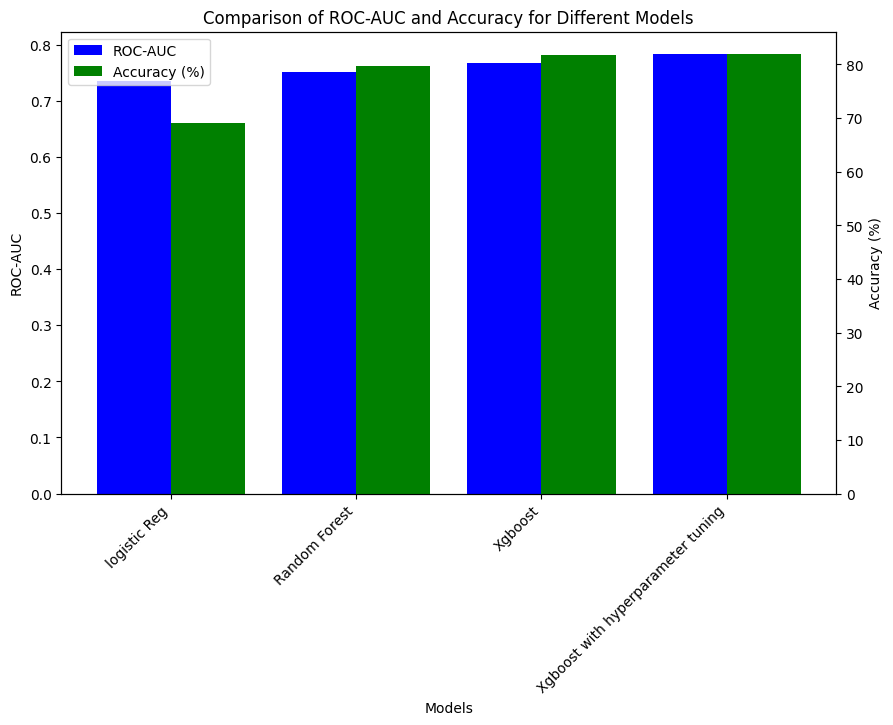

In [190]:
def plot_metrics_bar(models, model_names, roc_auc_scores, accuracies):
    num_models = len(models)
    x = np.arange(num_models)  

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Bar plot for ROC-AUC scores (using ax1)
    ax1.bar(x - 0.2, roc_auc_scores, width=0.4, label='ROC-AUC', color='b')
    ax1.set_xlabel('Models')
    ax1.set_ylabel('ROC-AUC')
    ax1.set_xticks(x)
    ax1.set_xticklabels(model_names, rotation=45, ha='right')

    # Bar plot for accuracies (using ax2, twinx)
    ax2 = ax1.twinx()
    ax2.bar(x + 0.2, accuracies, width=0.4, label='Accuracy (%)', color='g')
    ax2.set_ylabel('Accuracy (%)')

    # Display legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.title('Comparison of ROC-AUC and Accuracy for Different Models')
    plt.show()

models = [logit, rf, xgboost, best_model]
model_names = ['logistic Reg', 'Random Forest', 'Xgboost', 'Xgboost with hyperparameter tuning']
roc_auc_scores = [0.735,0.751, 0.767,0.784] 
accuracies = [69,79.7,81.8,82]  

plot_metrics_bar(models, model_names, roc_auc_scores, accuracies)

### Conclusion: 

* In this project, we first check for data unbalancing, visualize the feaure and investigate in the relationship between different feature to find the strongest predictors of default payment
Among all the ML model we use to predict the default credit card, XGboost is the best model with highest accuracy score